(vis-openMeter)=
# Visualisierung der Daten von openMeter

## python konfigurieren

### Module importieren

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import os.path
import platform
from PIL import Image
import requests
import scipy
from scipy.optimize import curve_fit
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('platform', platform.__version__)
print('Image', Image.__version__)
print('requests', requests.__version__)
print('scipy', scipy.__version__)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.3
datetime <module 'datetime' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\datetime.py'>
seaborn 0.11.2
plotly 5.4.0
sys 3.9.6 (default, Aug 18 2021, 15:44:49) [MSC v.1916 64 bit (AMD64)]
os <module 'os' from 'C:\\Users\\andre\\anaconda3\\envs\\SYE-env\\lib\\os.py'>
platform 1.0.8
Image 8.3.1
requests 2.26.0
scipy 1.7.1


### Grafikparameter einstellen

In [3]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    #pd.set_option('display.latex.repr', True)
    #pd.set_option('display.latex.longtable', True)
    #plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

## Darstellung der Daten

Die Daten stammen von {cite:p}`noauthor_openmeter_nodate` und sind unter einer [Open Data Commons (ODbL) v1.0 Lizenz](https://opendatacommons.org/licenses/odbl/1-0/) veröffentlicht.

Hier sind die die Daten zum elektrischen Verbrauch [kW] einer Realschule aus Wuppertal, NRW, dargestellt:

__als Zeitreihe:__

In [5]:
openMeterData = pd.read_csv('../../data/openMeter-Realschule.csv')
openMeterData.set_index('ts', inplace=True)
openMeterData.index = pd.to_datetime(openMeterData.index)

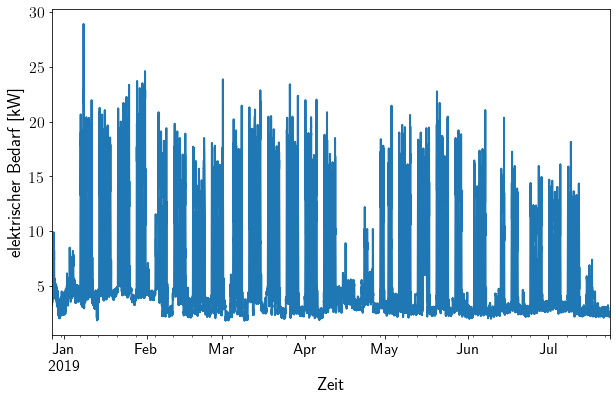

In [6]:
openMeterData.plot(xlabel='Zeit', ylabel=r'elektrischer Bedarf [kW]', legend=False);

Hier sind einige Ferienzeiträume zu erkennen (Neujahr, Ostern, Sommerferien), dort ist der Verbrauch geringer.

__als Dauerlinie:__

In [7]:
openMeterSorted = openMeterData.sort_values(by='data', ascending=False, ignore_index=True)

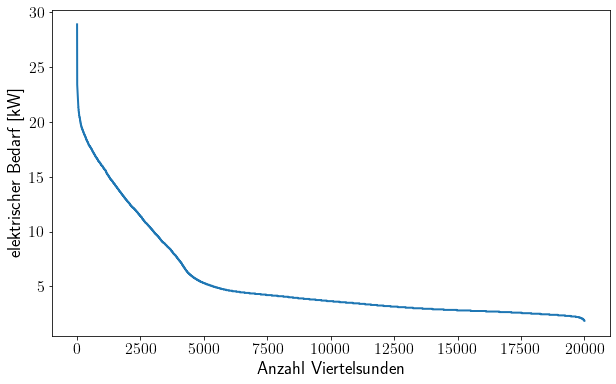

In [8]:
openMeterSorted.plot(xlabel='Anzahl Viertelsunden', ylabel='elektrischer Bedarf [kW]', legend=False);

__als heatmap:__

In [9]:
openMeterData['Datum'] = openMeterData.index.date
openMeterData['Zeit'] = openMeterData.index.time
openMeterDataPiv = openMeterData.pivot(index='Zeit', columns='Datum', values='data')

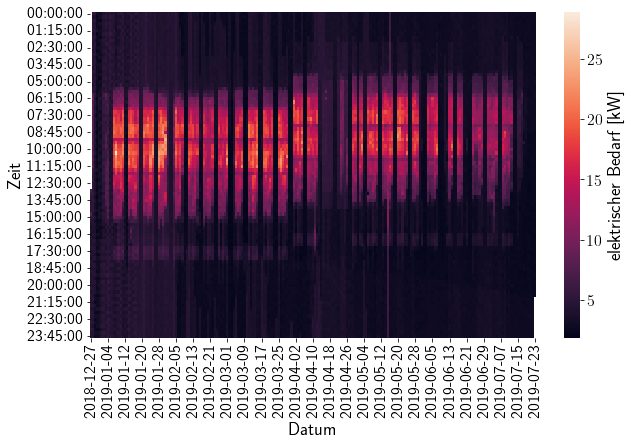

In [10]:
sns.heatmap(openMeterDataPiv, cbar_kws={'label': 'elektrischer Bedarf [kW]'});

In dieser darstellung sind auch Anfang sowie Ende der Schultage und Wochenenden gut zu erkennen. Auch der Wechsel von Winter- auf Sommerzeit macht sich bemerkbar.

```{bibliography}
:filter: docname in docnames
```